Data cleaning is the process of finding and correcting incorrect data present in the dataset. Handling mssing values is an important part of the data cleaning step. Most of the machine learning models  will provide an error if we pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce our model accuracy significantly.

For filling missing values, there are many methods available.

#### Types of missing data

- Missing completely at random (MCAR)
    - the data can be seen as a simple random sample of the entire dataset of interest
    - overly optimistic and frequently unfounded assumption
    - occurs when the chance of missing data is unrelated to the prediction value
    - solution is to delete rows and columns
    
- Missing at Random (MAR)
    - observed data are systematically linked to the missing data
    - May or may not result in a bias
    - Solution is data imputation

- Missing not at Random (MNAR)
    - missing data is always linked to the unobserved data
    - can be biased because the missing data sources aren’t counted
    - solution is to do more reserach on data and find missing values
    

#### Load the data

In [389]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##### Extract categorical columns

In [390]:
cat_cols = df.select_dtypes(include="O")
cat_cols

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN
1308,"Zimmerman, Mr. Leo",male,315082,NaN,S,NaN,NaN


##### Extract numerical columns

In [391]:
num_cols = df.select_dtypes(include=["int64","float64"])
num_cols

,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN
...,...,...,...,...,...,...,...
1305,3.0,0.0,NaN,1.0,0.0,14.4542,NaN
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,304.0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,NaN
1308,3.0,0.0,29.0000,0.0,0.0,7.8750,NaN


##### Drop the columns that will not be used for the case study

In [392]:
drop_list = ['name','ticket','home.dest','body','cabin','embarked','boat']
drop_list

['name', 'ticket', 'home.dest', 'body', 'cabin', 'embarked', 'boat']

In [393]:
df.drop(drop_list,axis=1,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


In [394]:
cols = df.columns
cols

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [395]:
#Applying Label encoding or One Hot encoding to the categorical variable - sex,survived 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['survived']=le.fit_transform(df['survived'])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1,0,29.0000,0.0,0.0,211.3375
1,1.0,1,1,0.9167,1.0,2.0,151.5500
2,1.0,0,0,2.0000,1.0,2.0,151.5500
3,1.0,0,1,30.0000,1.0,2.0,151.5500
4,1.0,0,0,25.0000,1.0,2.0,151.5500


##### Check for missing values

In [396]:
df.isnull().any()

pclass       True
survived    False
sex         False
age          True
sibsp        True
parch        True
fare         True
dtype: bool

In [397]:
df.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1310 non-null   int64  
 2   sex       1310 non-null   int32  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 66.6 KB


Only a few models like KNN can work with NAN values

##### Missing values visualization

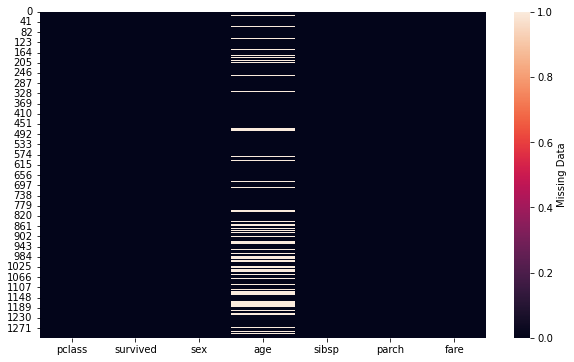

In [399]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cbar_kws={'label': 'Missing Data'})
plt.show()

The high number of missing in age can be seen in the heatmap(light region).

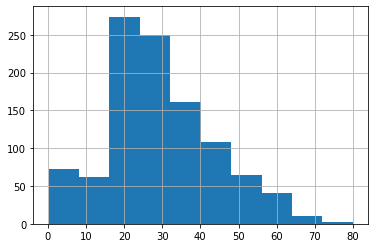

In [400]:
#looking at age column in more detail
df['age'].hist()
plt.show()

We can see the maximum values of age are concentrated between 15 - 45.

#### Handle Missing values

##### 1)Delete the column with missing data

In [401]:
#since the most missing values are in age, we can delete that column
import copy

updated_df=copy.deepcopy(df)
updated_df.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [402]:
#axis =1->drop column with NAN values 
updated_df=updated_df.dropna(axis=1)

In [403]:
updated_df.head()

,survived,sex
0,1,0
1,1,1
2,0,0
3,0,1
4,0,0


After deleting the columns with null values, very few relevant columns are left. Hence this approach is seldom used.

##### 2)Deleting the row with missing data 

In [404]:
new_df=copy.deepcopy(df)
new_df.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [405]:
#axis =0->drop rows with NAN values 
new_df = new_df.dropna(axis=0)
new_df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

##### Separate dependent and independent variables

In [406]:
cols =new_df.columns
cols

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [407]:
cols2=cols.difference(['survived'])
cols2

Index(['age', 'fare', 'parch', 'pclass', 'sex', 'sibsp'], dtype='object')

In [408]:
X=new_df[cols2]
X.shape

(1045, 6)

In [409]:
X.isnull().any()

age       False
fare      False
parch     False
pclass    False
sex       False
sibsp     False
dtype: bool

In [410]:
y=new_df['survived']
y

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1045, dtype: int64

In [411]:
y.isnull().any()

False

##### Separate data into train and test data

In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((836, 6), (836,)) ((209, 6), (209,))


##### Fit a logistic regression model 

In [413]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [414]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [415]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7272727272727273

We get an accuracy of 72%.

##### 3)Filling the missing values-Imputation

The missing values are filled up with a certain number 
- For numerical variable, fill up with mean or median.
- It can also be filled up with 0 or -999. this will make these values different from the actual data.
- For categorical variable, fill up with mode or new type of value.

In [420]:
updated_df2=copy.deepcopy(df)
updated_df2.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [421]:
#fill up all columns with missing data, with mean
updated_df2['pclass']=updated_df2['pclass'].fillna(updated_df2['pclass'].mean())
updated_df2['age']=updated_df2['age'].fillna(updated_df2['age'].mean())
updated_df2['sibsp']=updated_df2['sibsp'].fillna(updated_df2['sibsp'].mean())
updated_df2['parch']=updated_df2['parch'].fillna(updated_df2['parch'].mean())
updated_df2['fare']=updated_df2['fare'].fillna(updated_df2['fare'].mean())

updated_df2.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1,0,29.0000,0.0,0.0,211.3375
1,1.0,1,1,0.9167,1.0,2.0,151.5500
2,1.0,0,0,2.0000,1.0,2.0,151.5500
3,1.0,0,1,30.0000,1.0,2.0,151.5500
4,1.0,0,0,25.0000,1.0,2.0,151.5500


In [422]:
updated_df2.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

##### Fit logistic regression and evaluate accuracy

In [423]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=updated_df2[['pclass','sex','age','sibsp','parch','fare']]
y=updated_df2['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
y_train.head()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8079268292682927

We get an accuracy of 80%, which is a huge improvement over the previous values. Hence the columns with missing values like age have significant importance.

##### Imputation with sklearn library

In [424]:
updated_df3=copy.deepcopy(df)
updated_df3.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [425]:
from sklearn.impute import SimpleImputer
import numpy as np

#create the imputer object, using mean strategy
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [426]:
#fit the data to the imputer object
imputer.fit(updated_df3)

SimpleImputer()

In [427]:
cols3 = updated_df3.columns
cols3

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [428]:
#impute the data
updated_df3=imputer.transform(updated_df3)
updated_df3

array([[  1.        ,   1.        ,   0.        , ...,   0.        ,
          0.        , 211.3375    ],
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
          2.        , 151.55      ],
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
          2.        , 151.55      ],
       ...,
       [  3.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   7.225     ],
       [  3.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   7.875     ],
       [  2.29488159,   2.        ,   2.        , ...,   0.49885409,
          0.38502674,  33.29547928]])

In [429]:
updated_df3 = pd.DataFrame(updated_df3, columns=cols3)
updated_df3.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,0.0,25.0000,1.0,2.0,151.5500


In [430]:
updated_df3.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

##### Fit logistic regression and evaluate accuracy

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=updated_df3[['pclass','sex','age','sibsp','parch','fare']]
y=updated_df3['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8079268292682927

We get the same accuracy as above - 80%.

#### 4)Handling missing values using Interpolation–Linear

A straight line is used to join dots in increasing order to approximate a missing value.

For the most part, the unknown value is calculated in the same ascending order as the previous values. We don’t have to specify Linear Interpolation because it is the default method.

Almost always, it will be used in a time-series dataset.

In [525]:
updated_df4a=copy.deepcopy(df)
updated_df4a.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [526]:
updated_df4a['pclass']=updated_df4a['pclass'].fillna(updated_df4a['pclass'].mean())
updated_df4a['sibsp']=updated_df4a['sibsp'].fillna(updated_df4a['sibsp'].mean())
updated_df4a['parch']=updated_df4a['parch'].fillna(updated_df4a['parch'].mean())
updated_df4a['fare']=updated_df4a['fare'].fillna(updated_df4a['fare'].mean())
updated_df4a['survived']=updated_df4a['survived'].fillna(updated_df4a['survived'].mean())

updated_df4a.isnull().sum()

pclass        0
survived      0
sex           0
age         264
sibsp         0
parch         0
fare          0
dtype: int64

In [527]:
updated_df4a["age"] = updated_df4a["age"].interpolate(method='linear', limit_direction='forward', axis=0)
updated_df4a.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [528]:
updated_df4a.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1,0,29.0000,0.0,0.0,211.3375
1,1.0,1,1,0.9167,1.0,2.0,151.5500
2,1.0,0,0,2.0000,1.0,2.0,151.5500
3,1.0,0,1,30.0000,1.0,2.0,151.5500
4,1.0,0,0,25.0000,1.0,2.0,151.5500


In [529]:
y=updated_df4a['survived']
print(y.shape)
print(y.head())

(1310,)
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


In [530]:
X=updated_df4a[['pclass','sex','age','sibsp','parch','fare']]
print(X.shape)
print(X.head())

(1310, 6)
   pclass  sex      age  sibsp  parch      fare
0     1.0    0  29.0000    0.0    0.0  211.3375
1     1.0    1   0.9167    1.0    2.0  151.5500
2     1.0    0   2.0000    1.0    2.0  151.5500
3     1.0    1  30.0000    1.0    2.0  151.5500
4     1.0    0  25.0000    1.0    2.0  151.5500


In [531]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8140243902439024

Here our accuracy level has improved to 81.4%.

##### 5)Handling missing values using Regression model

The null values in one column are filled by fitting a regression model using other columns in the dataset.

In [457]:
updated_df4=copy.deepcopy(df)
updated_df4.isnull().sum()

pclass        1
survived      0
sex           0
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [472]:
updated_df4.shape

(1310, 7)

In [496]:
updated_df4['pclass']=updated_df4['pclass'].fillna(updated_df4['pclass'].mean())
updated_df4['sibsp']=updated_df4['sibsp'].fillna(updated_df4['sibsp'].mean())
updated_df4['parch']=updated_df4['parch'].fillna(updated_df4['parch'].mean())
updated_df4['fare']=updated_df4['fare'].fillna(updated_df4['fare'].mean())
updated_df4['survived']=updated_df4['survived'].fillna(updated_df4['survived'].mean())

updated_df4.isnull().sum()

pclass        0
survived      0
sex           0
age         264
sibsp         0
parch         0
fare          0
dtype: int64

In [474]:
updated_df4.isnull().sum()

pclass        0
survived      0
sex           0
age         264
sibsp         0
parch         0
fare          0
dtype: int64

In [475]:
#all rows without null becomes the train data
train_df = updated_df4[updated_df4['age'].isnull()==False]
train_df.shape

(1046, 7)

In [476]:
#all rows with null becomes the test data
test_df = updated_df4[updated_df4['age'].isnull()==True]
test_df.shape

(264, 7)

In [462]:
#separate the dependent and independent variables of train data
y = train_df['age']
y

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [477]:
#remove the age column
pd.options.mode.chained_assignment = None #turn off SettingWithCopyWarning 
train_df.drop("age",axis=1,inplace=True)

In [478]:
train_df.head()

,pclass,survived,sex,sibsp,parch,fare
0,1.0,1,0,0.0,0.0,211.3375
1,1.0,1,1,1.0,2.0,151.5500
2,1.0,0,0,1.0,2.0,151.5500
3,1.0,0,1,1.0,2.0,151.5500
4,1.0,0,0,1.0,2.0,151.5500


In [479]:
#remove the age column
test_df.drop("age",axis=1,inplace=True)

In [480]:
test_df.head()

,pclass,survived,sex,sibsp,parch,fare
15,1.0,0,1,0.0,0.0,25.9250
37,1.0,1,1,0.0,0.0,26.5500
40,1.0,0,1,0.0,0.0,39.6000
46,1.0,0,1,0.0,0.0,31.0000
59,1.0,1,0,0.0,0.0,27.7208


In [481]:
train_df.isnull().sum()

pclass      0
survived    0
sex         0
sibsp       0
parch       0
fare        0
dtype: int64

In [482]:
#fit linear regression model to predict the age column values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df,y)

LinearRegression()

In [483]:
#make predictions on missing null values
pred = lr.predict(test_df)

#assign to age column
test_df['age']= pred

In [488]:
#add age back to train data 
train_df['age']=y
print(train_df.head())
print(train_df.shape)

   pclass  survived  sex  sibsp  parch      fare      age
0     1.0         1    0    0.0    0.0  211.3375  29.0000
1     1.0         1    1    1.0    2.0  151.5500   0.9167
2     1.0         0    0    1.0    2.0  151.5500   2.0000
3     1.0         0    1    1.0    2.0  151.5500  30.0000
4     1.0         0    0    1.0    2.0  151.5500  25.0000
(1046, 7)


In [489]:
print(test_df.head())
print(test_df.shape)

    pclass  survived  sex  sibsp  parch     fare        age
15     1.0         0    1    0.0    0.0  25.9250  43.675105
37     1.0         1    1    0.0    0.0  26.5500  37.609119
40     1.0         0    1    0.0    0.0  39.6000  43.706664
46     1.0         0    1    0.0    0.0  31.0000  43.686817
59     1.0         1    0    0.0    0.0  27.7208  37.903874
(264, 7)


In [492]:
combined = pd.concat([train_df,test_df])
print(combined.head())
print(combined.shape)

   pclass  survived  sex  sibsp  parch      fare      age
0     1.0         1    0    0.0    0.0  211.3375  29.0000
1     1.0         1    1    1.0    2.0  151.5500   0.9167
2     1.0         0    0    1.0    2.0  151.5500   2.0000
3     1.0         0    1    1.0    2.0  151.5500  30.0000
4     1.0         0    0    1.0    2.0  151.5500  25.0000
(1310, 7)


In [493]:
#split into dependent and independent variable
y = combined['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [454]:
X=combined.drop("survived",axis=1,inplace=True)
print(X.head())
print(X.shape)

,pclass,sex,sibsp,parch,fare,age
0,1.0,0,0.0,0.0,211.3375,29.0000
1,1.0,1,1.0,2.0,151.5500,0.9167
2,1.0,0,1.0,2.0,151.5500,2.0000
3,1.0,1,1.0,2.0,151.5500,30.0000
4,1.0,0,1.0,2.0,151.5500,25.0000


In [494]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.6829268292682927

Here our accuracy level has dropped to 68%.

#### Conclusion

Data cleaning is a critical step of data pre-processing. Data loss may lead to skewed parameter estimations, reduced sample representativeness, and more complex research analysis. Ee looked at various approaches to handling missing data and how these techniques are used.